### `Import the main Libraries`

In [3]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Other
import os, joblib

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
## sklearn -- Models
from sklearn.ensemble import RandomForestClassifier

## Xgboost
from xgboost import XGBClassifier
#light gpm
from lightgbm import LGBMClassifier


### Data Collection and Processing

In [4]:
## Read the CSV file using pandas
FILE_PATH = os.path.join(os.getcwd(), 'pressure.csv')
pressure = pd.read_csv(FILE_PATH)


## Show the Head of the DF
pressure.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Gender,Smoking,Physical_activity,salt_content_in_the_diet,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,34,23,1,0,45961,48071,1,1
1,0,9.75,54,33,1,0,26106,25333,0,0
2,1,10.79,70,49,0,0,9995,29465,1,0
3,0,11.00,71,50,0,0,10635,7439,1,0
4,1,14.17,52,19,0,0,15619,49644,0,0


In [5]:
## Check some info about the Dataset to (see nulls and DataTypes)
pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Age                            2000 non-null   int64  
 3   BMI                            2000 non-null   int64  
 4   Gender                         2000 non-null   int64  
 5   Smoking                        2000 non-null   int64  
 6   Physical_activity              2000 non-null   int64  
 7   salt_content_in_the_diet       2000 non-null   int64  
 8   Chronic_kidney_disease         2000 non-null   int64  
 9   Adrenal_and_thyroid_disorders  2000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 156.4 KB


In [11]:
## Show some statistics about the Dataset
pressure.describe(include="all")

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Gender,Smoking,Physical_activity,salt_content_in_the_diet,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,0.493500,11.710035,46.558500,30.081500,0.496000,0.509500,25254.424500,24926.097000,0.5050,0.443500
std,0.500083,2.186701,17.107832,11.761208,0.500109,0.500035,14015.439623,14211.692586,0.5001,0.496922
min,0.000000,8.100000,18.000000,10.000000,0.000000,0.000000,628.000000,22.000000,0.0000,0.000000
25%,0.000000,10.147500,32.000000,20.000000,0.000000,0.000000,13605.750000,13151.750000,0.0000,0.000000
50%,0.000000,11.330000,46.000000,30.000000,0.000000,1.000000,25353.000000,25046.500000,1.0000,0.000000
75%,1.000000,12.945000,62.000000,40.000000,1.000000,1.000000,37382.250000,36839.750000,1.0000,1.000000
max,1.000000,17.560000,75.000000,50.000000,1.000000,1.000000,49980.000000,49976.000000,1.0000,1.000000


In [7]:
pressure.isna().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Age                              0
BMI                              0
Gender                           0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [8]:
pressure.duplicated().sum()

np.int64(0)

In [15]:
pressure.corr()['Blood_Pressure_Abnormality'].sort_values(ascending=False)


Blood_Pressure_Abnormality       1.000000
Chronic_kidney_disease           0.429188
Adrenal_and_thyroid_disorders    0.318598
Level_of_Hemoglobin              0.139488
Gender                           0.054902
BMI                              0.040193
Physical_activity                0.037952
salt_content_in_the_diet         0.014199
Smoking                          0.012250
Age                             -0.066322
Name: Blood_Pressure_Abnormality, dtype: float64

In [12]:
pressure.corr(numeric_only=True)

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Gender,Smoking,Physical_activity,salt_content_in_the_diet,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Blood_Pressure_Abnormality,1.000000,0.139488,-0.066322,0.040193,0.054902,0.012250,0.037952,0.014199,0.429188,0.318598
Level_of_Hemoglobin,0.139488,1.000000,-0.184394,0.117889,-0.412928,0.023349,-0.026604,0.022141,0.055262,0.030384
Age,-0.066322,-0.184394,1.000000,0.028151,0.057941,0.025314,0.027068,-0.045740,-0.057540,-0.025738
BMI,0.040193,0.117889,0.028151,1.000000,0.010219,0.008927,-0.004936,0.026385,0.012221,0.041061
Gender,0.054902,-0.412928,0.057941,0.010219,1.000000,-0.000848,0.006297,-0.009347,0.026082,-0.011981
Smoking,0.012250,0.023349,0.025314,0.008927,-0.000848,1.000000,-0.014974,0.003364,-0.025196,0.018267
Physical_activity,0.037952,-0.026604,0.027068,-0.004936,0.006297,-0.014974,1.000000,-0.032261,0.003938,0.000883
salt_content_in_the_diet,0.014199,0.022141,-0.045740,0.026385,-0.009347,0.003364,-0.032261,1.000000,-0.002856,0.019965
Chronic_kidney_disease,0.429188,0.055262,-0.057540,0.012221,0.026082,-0.025196,0.003938,-0.002856,1.000000,0.118897
Adrenal_and_thyroid_disorders,0.318598,0.030384,-0.025738,0.041061,-0.011981,0.018267,0.000883,0.019965,0.118897,1.000000


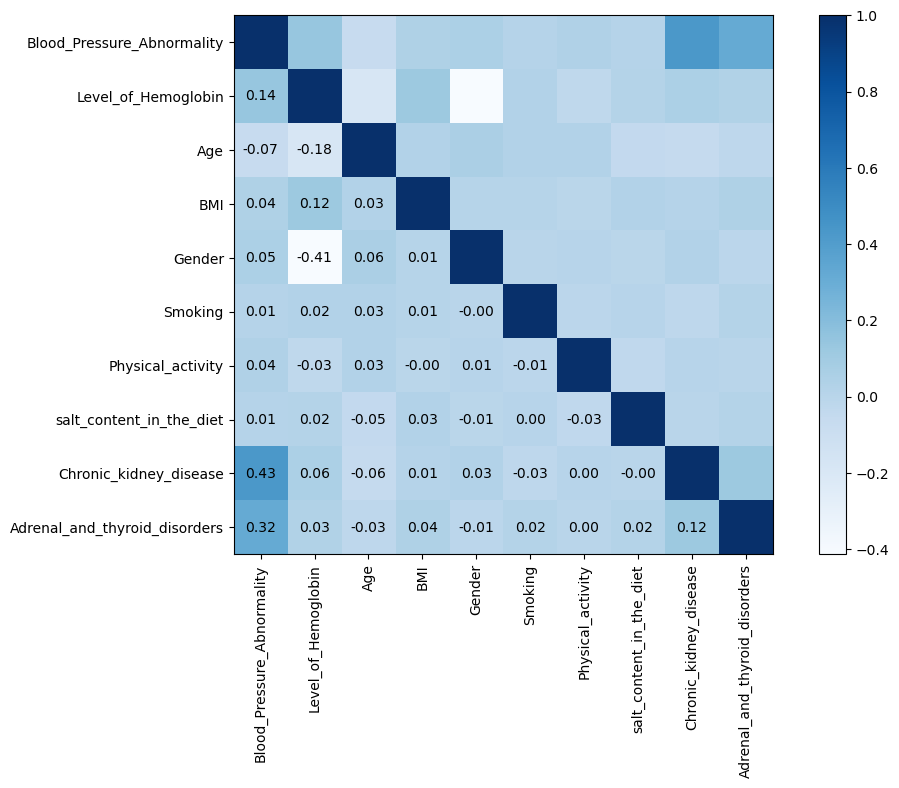

In [14]:
corr = pressure.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

In [16]:
pressure.Gender.value_counts().rename(index={0: 'Female', 1: 'Male'})


Gender
Female    1008
Male       992
Name: count, dtype: int64

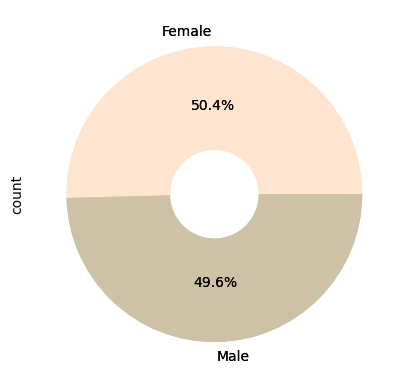

In [18]:
pressure.Gender.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"],labels=['Female', 'Male'] ,explode=(0,0), wedgeprops=dict(width=0.7));
plt.show()

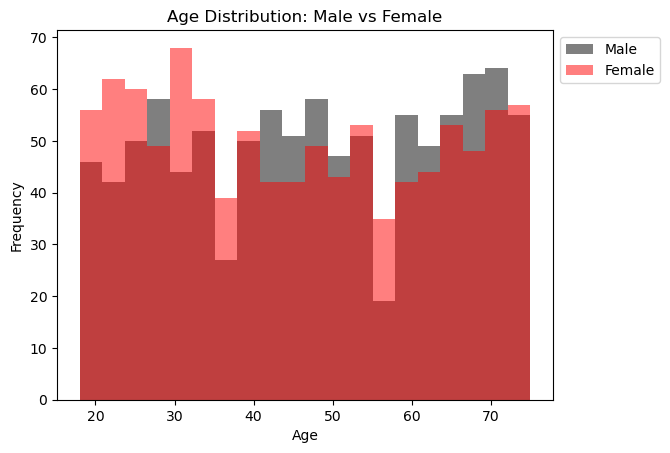

In [19]:

male_age = pressure[pressure['Gender'] == 1]['Age']  
female_age = pressure[pressure['Gender'] == 0]['Age'] 


plt.hist(male_age, bins=20, alpha=0.5, label='Male', color='black')
plt.hist(female_age, bins=20, alpha=0.5, label='Female', color='red' )


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: Male vs Female')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


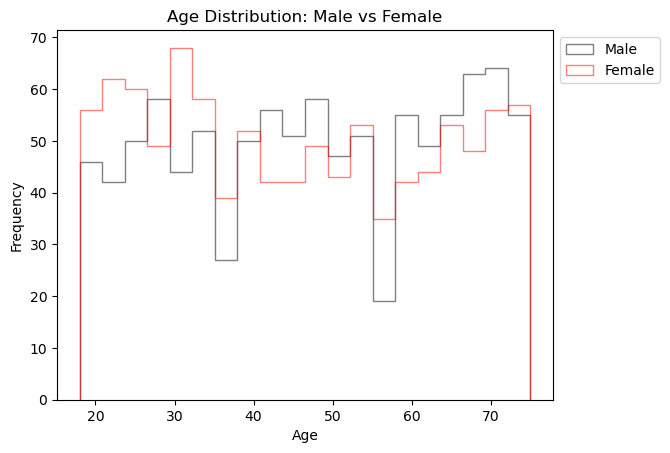

In [5]:

male_age = pressure[pressure['Gender'] == 1]['Age']   
female_age = pressure[pressure['Gender'] == 0]['Age'] 


plt.hist(male_age, bins=20, alpha=0.5, label='Male', color='black',histtype='step')
plt.hist(female_age, bins=20, alpha=0.5, label='Female', color='red',histtype='step' )


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: Male vs Female')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [7]:
def categorize_bmi(BMI):
    if BMI < 18.5:
        return 'Wightloss'
    elif 18.5 <= BMI < 25:
        return 'Normal'
    elif 25 <= BMI < 30:
        return 'Overwight'
    elif 30 <= BMI < 35:
        return 'Obesity class 1'
    elif 35<= BMI < 40:
        return 'Obesity class 2'
    else: 
        return 'Extreme Obesity'
pressure['BMI'].apply(categorize_bmi).value_counts()

BMI
Extreme Obesity    539
Wightloss          421
Normal             296
Overwight          259
Obesity class 2    246
Obesity class 1    239
Name: count, dtype: int64

In [8]:
grouped = pressure.groupby([pressure['BMI'].apply(categorize_bmi), pressure['Gender'].map({0: 'Female', 1: 'Male'})]).size().unstack()
grouped

Gender,Female,Male
BMI,,
Extreme Obesity,280,259
Normal,151,145
Obesity class 1,115,124
Obesity class 2,113,133
Overwight,135,124
Wightloss,214,207


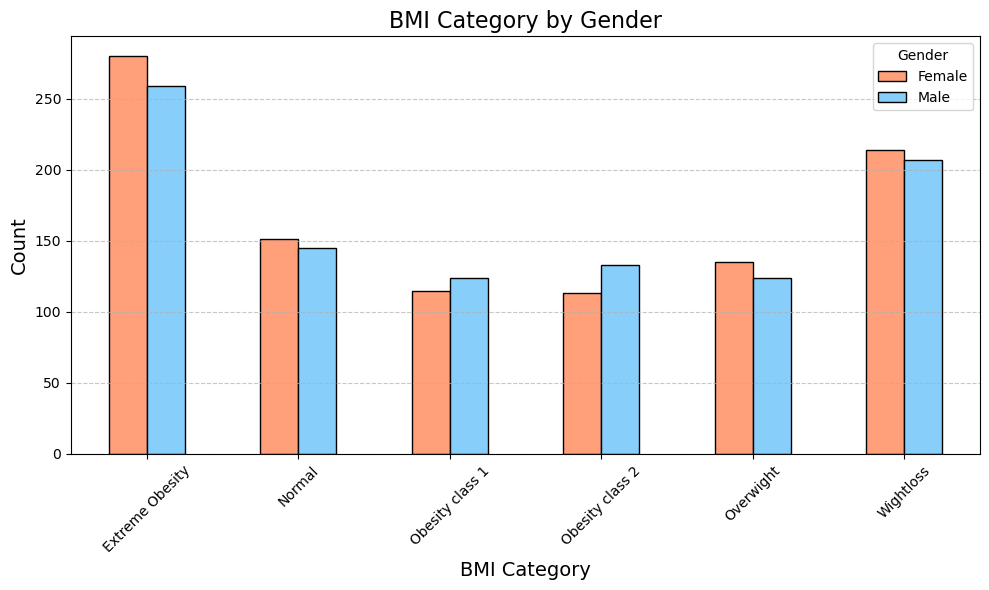

In [9]:

grouped.plot(kind='bar', figsize=(10,6), color=['#FFA07A', '#87CEFA'], edgecolor='black')

plt.title('BMI Category by Gender', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
pressure.Smoking.value_counts().rename(index={0: 'no_smoke', 1: 'smoke'})


Smoking
smoke       1019
no_smoke     981
Name: count, dtype: int64

In [12]:
grouped = pressure.groupby([pressure['Smoking'].map({0: 'no_smoke', 1: 'smoke'}), pressure['Gender'].map({0: 'Female', 1: 'Male'})]).size().unstack()
grouped


Gender,Female,Male
Smoking,,
no_smoke,494,487
smoke,514,505


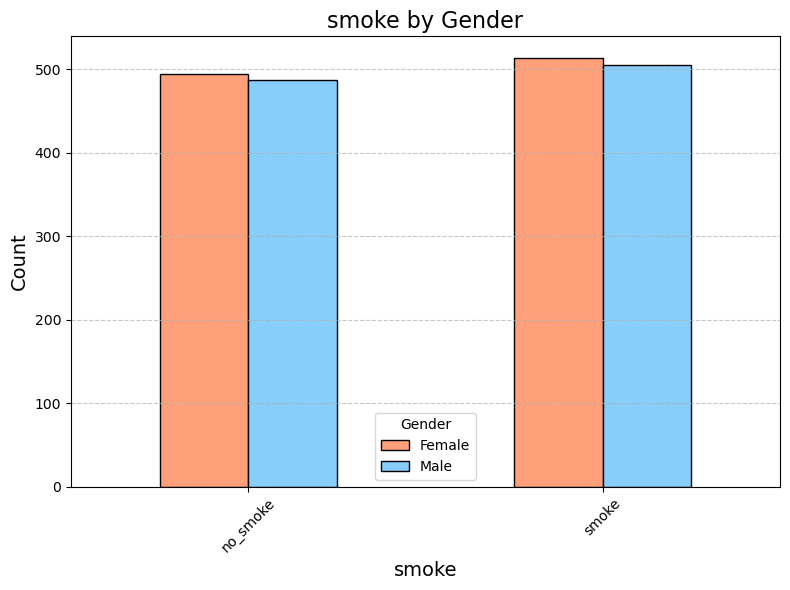

In [13]:

grouped.plot(kind='bar', figsize=(8,6), color=['#FFA07A', '#87CEFA'], edgecolor='black')

plt.title('smoke by Gender', fontsize=16)
plt.xlabel('smoke', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


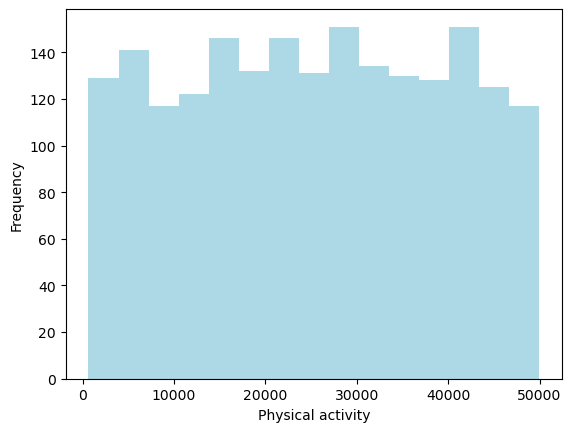

In [18]:
plt.hist(pressure.Physical_activity, bins=15, color='lightblue',  linewidth=2)
plt.xlabel('Physical activity')
plt.ylabel('Frequency')
plt.show()

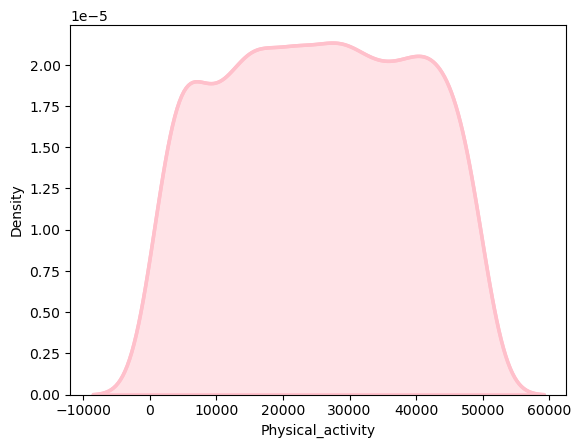

In [20]:
sns.kdeplot(pressure.Physical_activity ,fill=True  , color="pink", linewidth=2.5 )
plt.show()

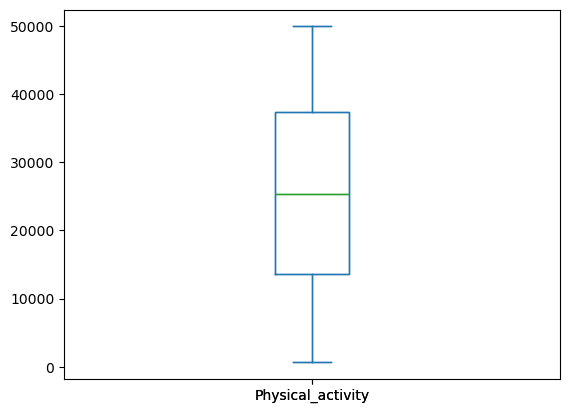

In [22]:
pressure.Physical_activity.plot(kind="box")
plt.show()

### `Split the Dataset`


In [46]:
## Split the whole Dataset to Feature & Target
X = pressure.drop(columns=['Blood_Pressure_Abnormality'], axis=1)   ## Features
y = pressure['Blood_Pressure_Abnormality']   ## target


In [47]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42) 
## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (1600, 9)
y_train shape --  (1600,)
X_test shape --  (400, 9)
y_test shape --  (400,)


In [48]:
X_train.median(axis=0)

Level_of_Hemoglobin                 11.315
Age                                 47.000
BMI                                 30.000
Gender                               1.000
Smoking                              1.000
Physical_activity                25489.000
salt_content_in_the_diet         25260.500
Chronic_kidney_disease               1.000
Adrenal_and_thyroid_disorders        0.000
dtype: float64

### `Pipeline for Numerical Feature


In [49]:
## Building a pipeline for numerical variables
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', RobustScaler())
                              ]
                       )
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test)  ## test

### `Building ML Models`


### ` RandomForest`

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1) 
forest_clf.fit(X_train , y_train)  ## train



RandomForestClassifier(max_depth=6, max_samples=0.8, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [51]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(forest_clf, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(forest_clf, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8125 0.7594 0.7312 0.7688 0.8094]
Mean Accuracy: 0.7762
CV F1 Scores: [0.8121 0.7587 0.7312 0.7686 0.8094]
Mean F1: 0.7760
Final Accuracy: 0.7762
Confusion Matrix:
[[635 155]
 [203 607]]


### `RF Tuning`

In [52]:
#RandomizedSearchCV search "randomly" for hyperparameters used cross validation 

params_best_forest = {'n_estimators': np.arange(200, 700, 50), 
                      'max_depth': np.arange(4, 20, 2),        
                      'max_samples':np.arange(.1, 1, .1) } 
## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_clf, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='accuracy', 
                                          cv=5, verbose=6, random_state=42)
search_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=0.822 total time=   0.2s
[CV 2/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=0.753 total time=   0.2s
[CV 3/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=0.734 total time=   0.2s
[CV 4/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=0.759 total time=   0.2s
[CV 5/5] END max_depth=10, max_samples=0.8, n_estimators=200;, score=0.794 total time=   0.2s
[CV 1/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.819 total time=   0.2s
[CV 2/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.747 total time=   0.2s
[CV 3/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.738 total time=   0.2s
[CV 4/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.759 total time=   0.2s
[CV 5/5] END max_depth=10, m

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    max_samples=0.8,
                                                    n_estimators=150, n_jobs=-1,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650])},
                   random_state=42, scoring='accuracy', verbose=6)

In [53]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)
## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': np.int64(350), 'max_samples': np.float64(0.4), 'max_depth': np.int64(8)}
best_forest --  RandomForestClassifier(max_depth=np.int64(8), max_samples=np.float64(0.4),
                       n_estimators=np.int64(350), n_jobs=-1, random_state=42)


In [54]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_forest, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_forest, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_forest, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8281 0.7562 0.7344 0.7656 0.8125]
Mean Accuracy: 0.7794
CV F1 Scores: [0.828  0.7558 0.7344 0.7656 0.8124]
Mean F1: 0.7792
Final Accuracy: 0.7794
Confusion Matrix:
[[630 160]
 [193 617]]


### `Feature Importance using RF`

In [55]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(X_train, best_forest.feature_importances_):  
    feat_import_forest[name] = score
feat_import_forest

{'Level_of_Hemoglobin': np.float64(0.314720091904142),
 'Age': np.float64(0.08427071486921058),
 'BMI': np.float64(0.0784470932555419),
 'Gender': np.float64(0.016148734069081728),
 'Smoking': np.float64(0.011949424478985867),
 'Physical_activity': np.float64(0.09184858657060278),
 'salt_content_in_the_diet': np.float64(0.09395024416530927),
 'Chronic_kidney_disease': np.float64(0.2078857739329399),
 'Adrenal_and_thyroid_disorders': np.float64(0.10077933675418599)}

In [56]:
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)
df_feat_import_forest

,Features,Scores
0,Level_of_Hemoglobin,0.314720
7,Chronic_kidney_disease,0.207886
8,Adrenal_and_thyroid_disorders,0.100779
6,salt_content_in_the_diet,0.093950
5,Physical_activity,0.091849
1,Age,0.084271
2,BMI,0.078447
3,Gender,0.016149
4,Smoking,0.011949


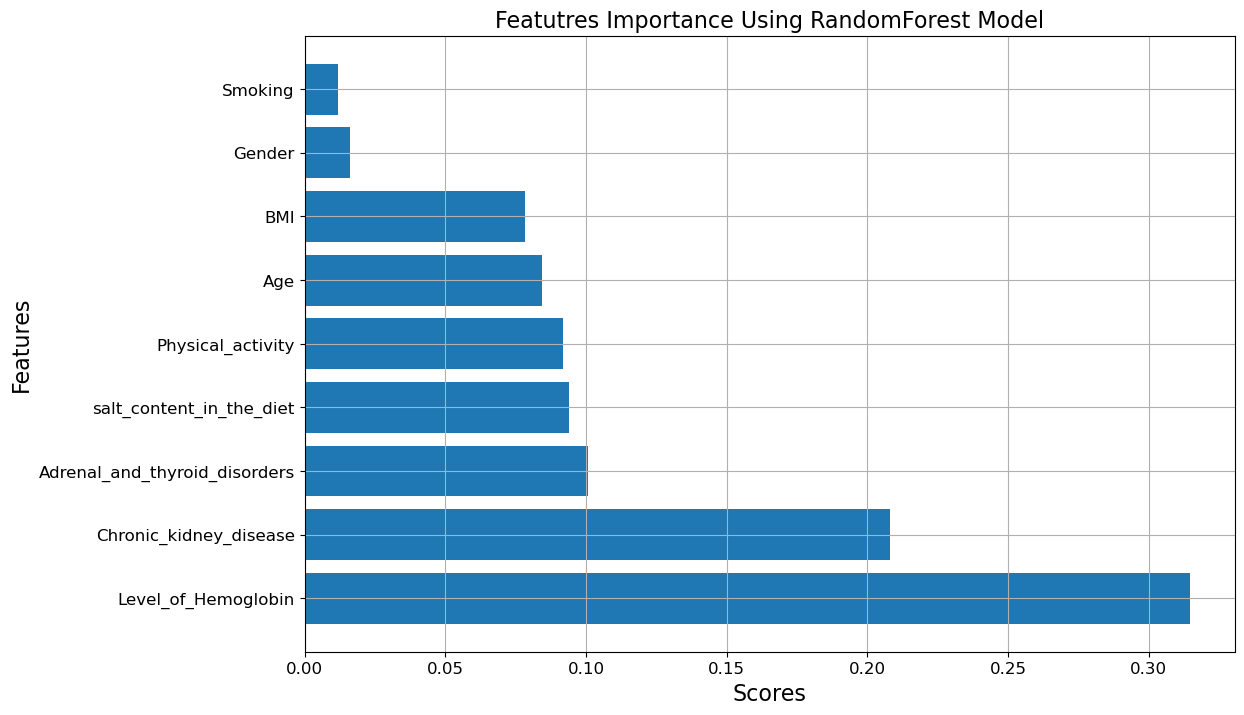

In [57]:
## plotting
plt.figure(figsize=(12, 8))
#horizontal bar
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12) 
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### ` XGboost`

In [58]:
## Using the Hero API -- XGBOOST
xgb_clf = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(xgb_clf, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(xgb_clf, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(xgb_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8031 0.7594 0.7344 0.7531 0.7656]
Mean Accuracy: 0.7631
CV F1 Scores: [0.8031 0.7593 0.7343 0.7529 0.7655]
Mean F1: 0.7630
Final Accuracy: 0.7631
Confusion Matrix:
[[612 178]
 [201 609]]


### `Tuning XGBoost`

In [60]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 30), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.7,0.8, 0.9]}
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=params_best_xgb, cv=5, 
                        scoring='accuracy', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 130, 160, 190]),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=6)

In [61]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.2, 'max_depth': np.int64(2), 'n_estimators': np.int64(100), 'subsample': 0.9}
best_xgb --  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(2), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None, ...)


In [62]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_xgb, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_xgb, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_xgb, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8094 0.7406 0.7469 0.7969 0.8062]
Mean Accuracy: 0.7800
CV F1 Scores: [0.8094 0.7403 0.7468 0.7966 0.8062]
Mean F1: 0.7799
Final Accuracy: 0.7800
Confusion Matrix:
[[637 153]
 [199 611]]


### `Feature Importance using XGBoost`

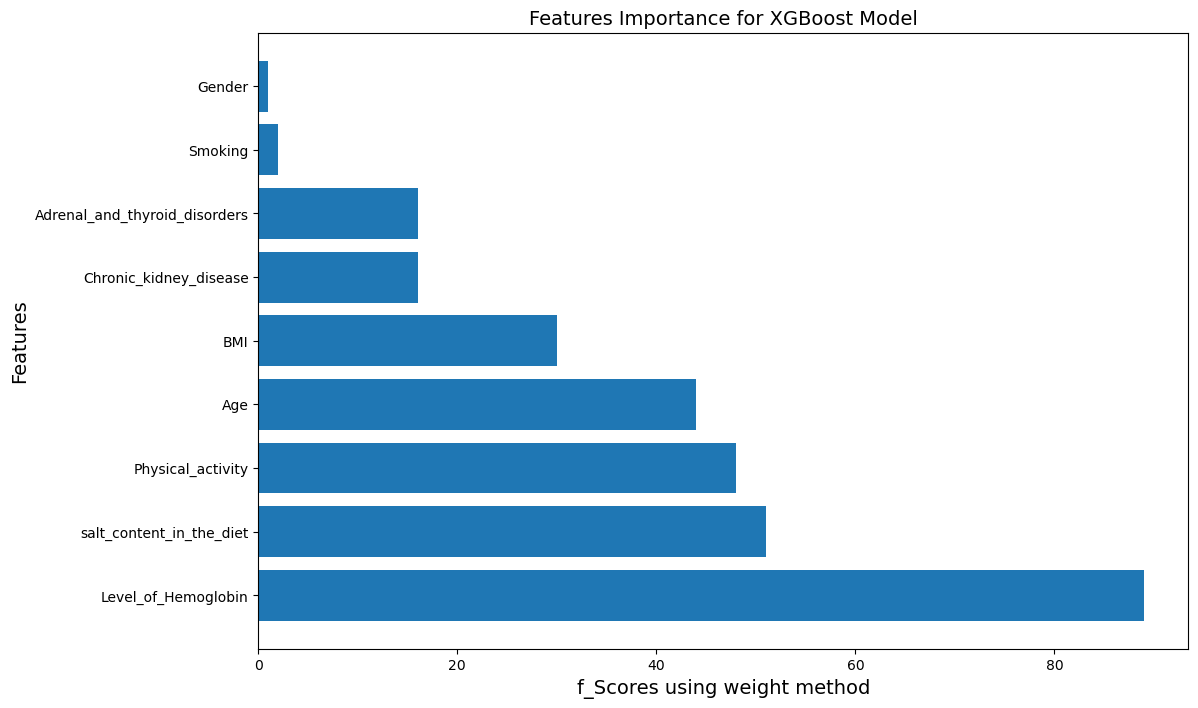

In [63]:
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  ## the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   ## to DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  ## Some Modification

df_feat_import_xgb = df_feat_import_xgb

# ## Some Sort to plot
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

### `LGBM`

In [64]:
lgbm_clf = LGBMClassifier( n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8,random_state=42)

In [65]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 810, number of negative: 790
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(max_depth=6, random_state=42, subsample=0.8)

In [66]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(lgbm_clf, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(lgbm_clf, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(lgbm_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8062 0.7344 0.6969 0.7594 0.775 ]
Mean Accuracy: 0.7544
CV F1 Scores: [0.8063 0.7343 0.6969 0.7593 0.7749]
Mean F1: 0.7543
Final Accuracy: 0.7544
Confusion Matrix:
[[603 187]
 [206 604]]


### `Tuning LGBM`

In [67]:
### Let's try tuning lgbm using GridSearchCV  --- needs alot of tuning
params_best_lgbm = {'n_estimators': np.arange(100, 200, 30), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.7,0.8, 0.9]}
grid_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=params_best_lgbm, cv=5, 
                        scoring='accuracy', n_jobs=-1, verbose=6)
grid_lgbm.fit(X_train, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[LightGBM] [Info] Number of positive: 810, number of negative: 790
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=6, random_state=42,
                                      subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 130, 160, 190]),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=6)

In [68]:
## Get the best Params
best_lgbm_params = grid_lgbm.best_params_
print('best_lgbm_params -- ', best_lgbm_params)

## Get the best estimator
best_lgbm = grid_lgbm.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_lgbm)

best_lgbm_params --  {'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': np.int64(100), 'subsample': 0.7}
best_xgb --  LGBMClassifier(max_depth=np.int64(2), n_estimators=np.int64(100),
               random_state=42, subsample=0.7)


In [69]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_lgbm, X=X_train, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_lgbm, X=X_train, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_lgbm, X=X_train, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8188 0.7438 0.7531 0.7719 0.8156]
Mean Accuracy: 0.7806
CV F1 Scores: [0.8184 0.7433 0.7524 0.7715 0.8155]
Mean F1: 0.7802
Final Accuracy: 0.7806
Confusion Matrix:
[[652 138]
 [213 597]]


### `Feature Importance using LGBM`

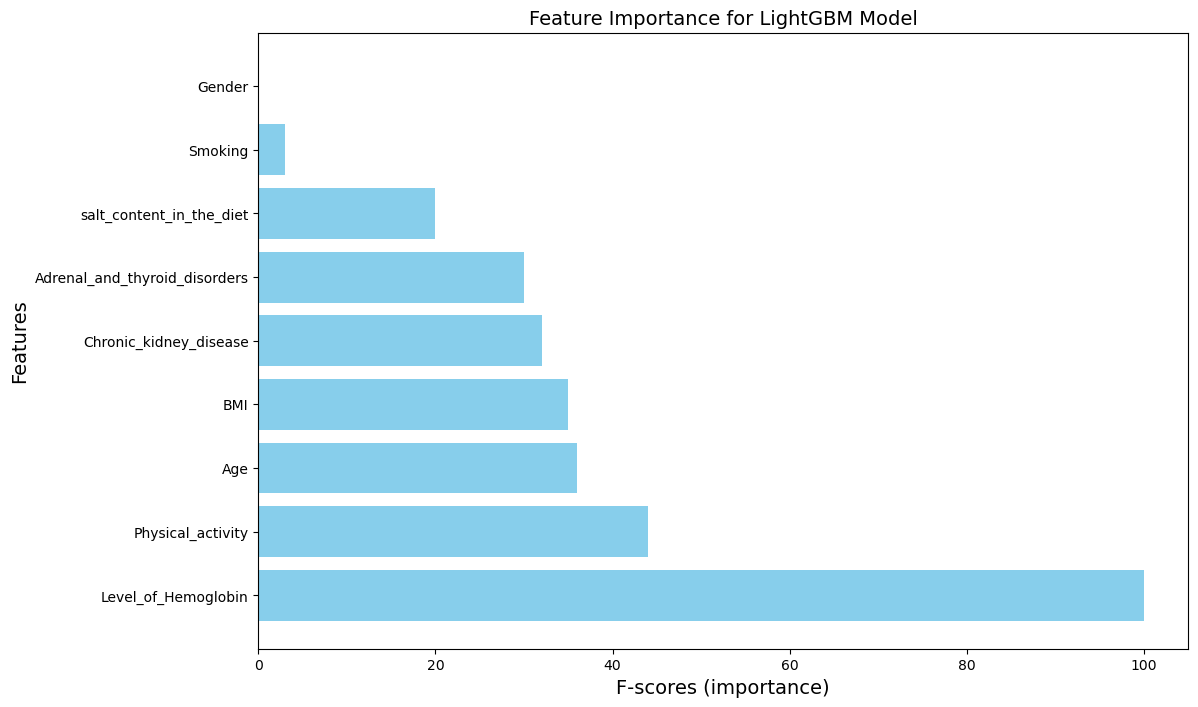

In [70]:
# 1. Get feature importance from LightGBM
feat_import_lgbm = best_lgbm.feature_importances_  # Use .feature_importances_ for LightGBM
feature_names = best_lgbm.feature_name_  # Or your original feature names if not available

# 2. Create DataFrame
df_feat_import_lgbm = pd.DataFrame({
    'Features': feature_names,
    'f_scores': feat_import_lgbm
})

# 3. Sort by importance
df_feat_import_lgbm = df_feat_import_lgbm.sort_values(by='f_scores', ascending=False)

# 4. Plot (use plt.barh for horizontal bars)
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_lgbm['Features'], width=df_feat_import_lgbm['f_scores'], color='skyblue')
plt.title('Feature Importance for LightGBM Model', fontsize=14, color='k')
plt.xlabel('F-scores (importance)', fontsize=14, color='k')
plt.ylabel('Features', fontsize=14, color='k')
plt.show()

### `Download the best Model --- best_xgb`

In [71]:
joblib.dump(best_lgbm, 'pressure_model.sav.pkl')

['pressure_model.sav.pkl']

In [72]:
loaded_model = joblib.load('pressure_model.sav.pkl')
loaded_model

LGBMClassifier(max_depth=np.int64(2), n_estimators=np.int64(100),
               random_state=42, subsample=0.7)

### `Inference on Test Dataset`

In [73]:
y_pred_test = loaded_model.predict(X_test) 

## accuraccy on test after finishing all my work
accuracy_test = np.sqrt(accuracy_score(y_test, y_pred_test)) 
print(f'accuracy on test Dataset using lgbm -- {accuracy_test:.3f}') 

accuracy on test Dataset using lgbm -- 0.885
